<h1>Basics</h1>

Generating Grayscale Image

255


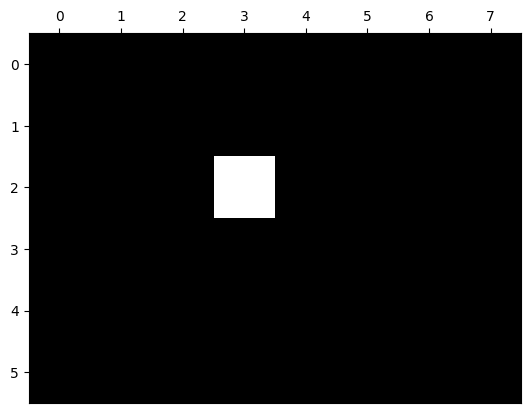

In [9]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
im = np.zeros((6,8), dtype=np.uint8)
im[2, 3] = 255
print(im[2, 3])
fig ,ax = plt.subplots()
ax.imshow(im, cmap='gray', vmin=0, vmax=255)
ax.xaxis.tick_top()
plt.show()

Generating a Color image

[  0   0 255]


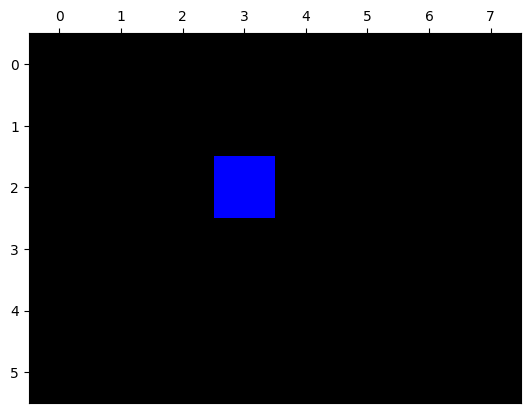

In [12]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
im = np.zeros((6,8,3), dtype=np.uint8)
im[2, 3] = [0, 0, 255] # R-G-B
print(im[2, 3])
fig, ax = plt.subplots()
ax.imshow(im)
ax.xaxis.tick_top()
plt.show()

Displaying image using Matplotlib

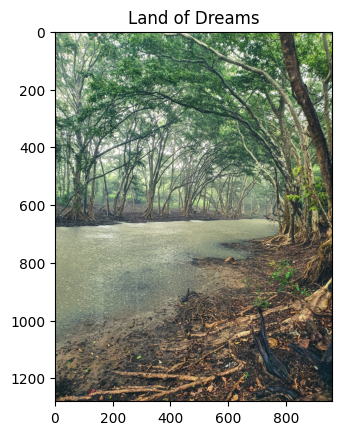

In [15]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread('Land of Dreams.jpeg', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(img)
ax.set_title('Land of Dreams')
plt.show()

Displaying image using OpenCV

In [13]:
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread('Land of Dreams.jpeg', cv.IMREAD_COLOR)
cv.namedWindow('image', cv.WINDOW_NORMAL)
cv.imshow('image', img)
cv.waitKey(0)
cv.destroyAllWindows()

Displaying image properties

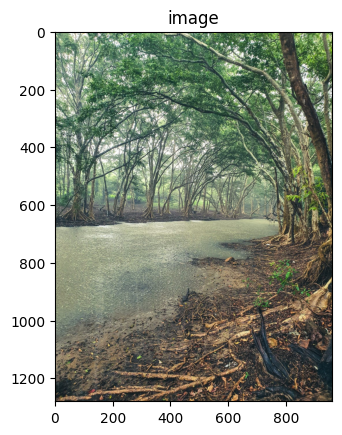

(1280, 960, 3)
3686400
uint8


In [23]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread('Land of Dreams.jpeg', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(img)
ax.set_title('image')
plt.show()
print(img.shape)
print(img.size)
print(img.dtype) 

Increasiing the brightness using OpenCV

133 233 233
147 247 247
159 3 255
163 7 255
175 19 255
192 36 255
203 47 255
227 71 255
205 49 255
160 4 255


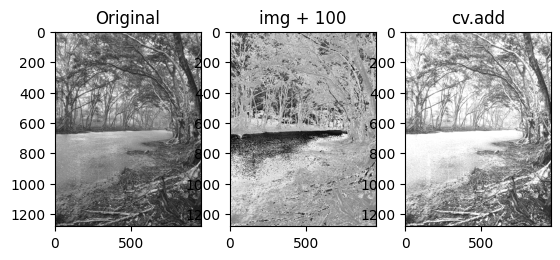

In [15]:
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread('Land of Dreams.jpeg', cv.IMREAD_GRAYSCALE)
imgb = img + 100
imgc = cv.add(img, 100)
f, ax = plt.subplots(1, 3)
ax[0].imshow(img, cmap="gray")
ax[0].set_title('Original')
ax[1].imshow(imgb, cmap="gray")
ax[1].set_title('img + 100')
ax[2].imshow(imgc, cmap="gray")
ax[2].set_title('cv.add')
for i in range(10):
    print(img[50+i,100], imgb[50+i,100], imgc[50+i,100])


Increase the brightness using loops

133 233
147 247
159 255
163 255
175 255
192 255
203 255
227 255
205 255
160 255


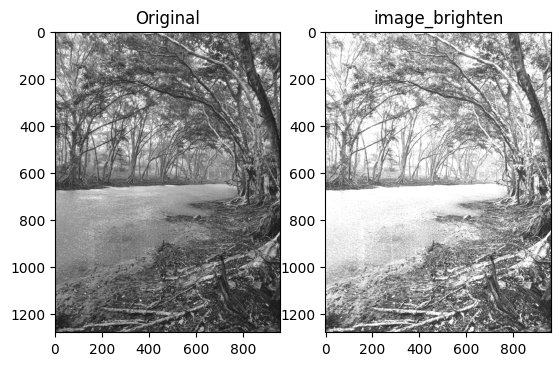

In [23]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
def image_brighten(image, shift):
    h = image.shape[0]
    w = image.shape[1]
    result = np.zeros(image.shape, image.dtype)
    for i in range(0, h):
        for j in range(0, w):
            # no_overflow = True if image[i, j] + shift < 255 else False
            # result[i, j] = min(image[i, j] + shift, 255) if no_overflow else 255
            if image[i, j] + shift < 255:
                result[i, j] = image[i, j] + shift
            else:
                result[i, j] = 255
                
    return result

img = cv.imread('Land of Dreams.jpeg', cv.IMREAD_GRAYSCALE)
%timeit 
img1 = image_brighten(img, 100)
f, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(img1, cmap='gray')
ax[1].set_title('image_brighten')
# for i in range(10):
#     print(img[50+i,100], img1[50+i,100])

Zeroing out green and blue planes

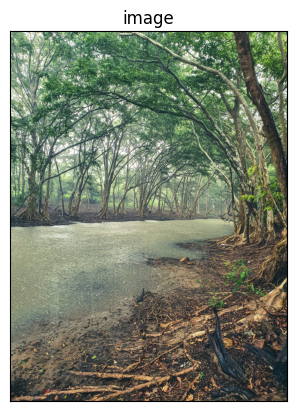

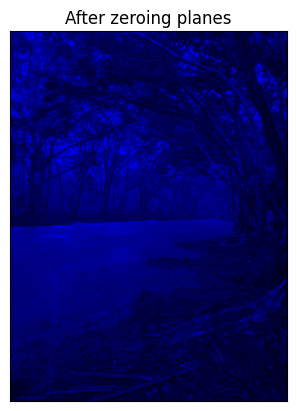

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv
img = cv.imread('Land of Dreams.jpeg', cv.IMREAD_ANYCOLOR)
if img is None: 
    assert False, 'Image could not be read'
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('image')
plt.show()
img[:, :, 0:2] = 0
plt.imshow(img)
plt.title('After zeroing planes')
plt.show()


<h1>Intensitiy Transformation</h1>

Identity Transformation code

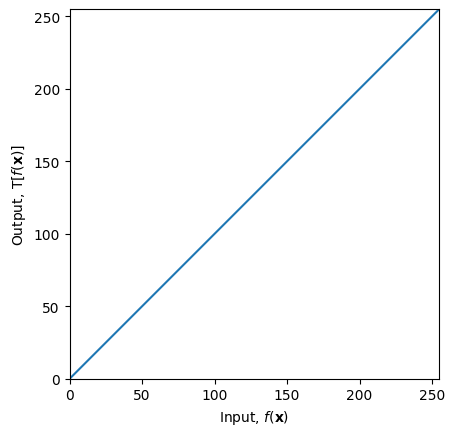

(1280, 960)


In [26]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
transform = np.arange(0, 256).astype('uint8')
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
# plt.savefig('transform.png')
plt.show()
img_orig = cv.imread('Land of Dreams.jpeg', cv.IMREAD_GRAYSCALE)
print(img_orig.shape)
cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig, transform)
cv.imshow('Image', image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

Identity Transformation code using numpy

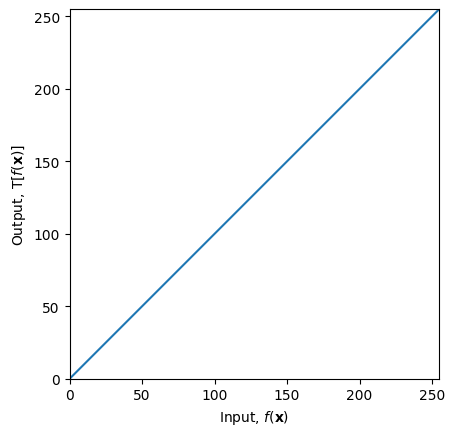

(1280, 960)


In [4]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
transform = np.arange(0, 256).astype('uint8')
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
# plt.savefig('transform.png')
plt.show()
img_orig = cv.imread('Land of Dreams.jpeg', cv.IMREAD_GRAYSCALE)
print(img_orig.shape)
cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', img_orig)
cv.waitKey(0)
# image_transformed = cv.LUT(img_orig, transform)
image_transformed = transform[img_orig]
cv.imshow('Image', image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

Negative Transform

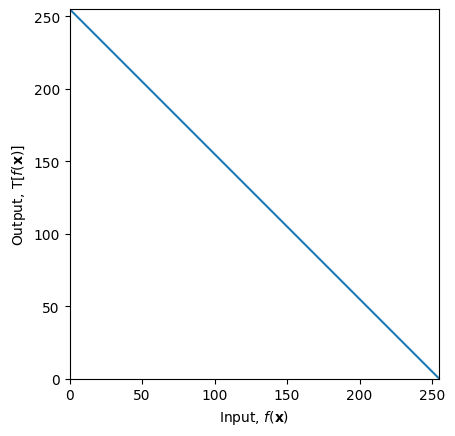

In [37]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
transform = np.arange(255, -1, -1).astype('uint8')
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
# plt.savefig('transform.png')
plt.show()
img_orig = cv.imread('Land of Dreams.jpeg', cv.IMREAD_GRAYSCALE)
# print(img_orig.shape)
cv.namedWindow('Image', cv.WINDOW_NORMAL)
cv.imshow('Image', img_orig)
cv.waitKey(0)
# image_transformed = cv.LUT(img_orig, transform)
image_transformed = transform[img_orig]
cv.namedWindow('Image Transform', cv.WINDOW_AUTOSIZE)
cv.imshow('Image Transform', image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

Intensity Transform

[[100  50]
 [150 200]]
[ 0  0  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10 11 11
 12 12 13 13 14 14 15 15 16 16 17 17 18 18 19 19 20 20 21 21 22 22 23 23
 24 24 25 25 26 26 27 27 28 28 29 29 30 30 31 31 32 32 33 33 34 34 35 35
 36 36 37 37 38 38 39 39 40 40 41 41 42 42 43 43 44 44 45 45 46 46 47 47
 48 48 49 49 50]
101
[ 51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 102
 105 108 111 114 117 120 123 127 130 133 136 139 142 145 148 151 154 157
 160 163 166 169 172 175 178 181 184 187 190 193 196 200]
50
[201 201 202 202 203 203 204 204 205 205 206 206 207 207 208 208 209 209
 210 210 211 211 212 212 213 213 214 215 215 216 216 217 217 218 218 219
 219 220 220 221 221 222 222 223 223 224 224 225 225 226 226 227 228 228
 229 229 230 230 231 231 232 232 233 233 234 234 235 235 236 236 237 237
 238 238 239 239 240 240 241 242 242 243 243 244 244 245 245 246 246 247
 247 248 248 249 249 250 250 251 251 252 252 253 253 254 255]
105
256


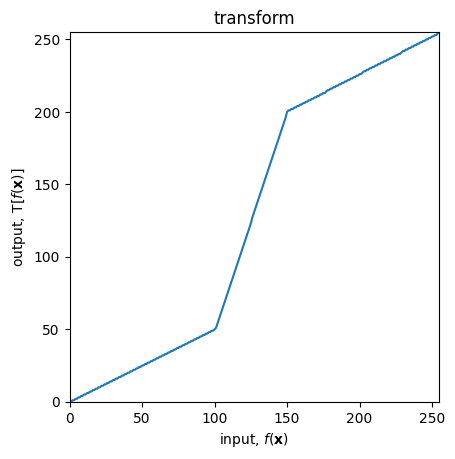

In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
c = np.array([(100, 50), (150, 200)])
print(c)
t1 = np.linspace(0, c[0,1], c[0,0]+1-0).astype('uint8')
print(t1)
print(len(t1))
t2 = np.linspace(c[0,1]+1, c[1,1], c[1,0]-c[0,0]).astype('uint8') 
print(t2)
print(len(t2))
t3 = np.linspace(c[1,1]+1, 255, 255-c[1,0]).astype('uint8')
print(t3)
print(len(t3))
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_title('transform')
ax.set_xlabel(r'input, $f(\mathbf{x})$')
ax.set_ylabel(r'output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
# plt.savefig('transform.png')
plt.show()
img_org = cv.imread('Land of Dreams.jpeg', cv.IMREAD_GRAYSCALE)
cv.namedWindow('original', cv.WINDOW_NORMAL)
cv.imshow('original', img_org)
cv.waitKey(0)
image_transformed = cv.LUT(img_org, transform)
cv.namedWindow('transformed', cv.WINDOW_NORMAL)
cv.imshow('transformed', image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()